In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [4]:
def simulate_maldi_spectra(image, num_mz_bins):
    """
    Simulates MALDI spectra for each pixel in the input image.

    Parameters:
        image (np.ndarray): Input image as a NumPy array.
        num_mz_bins (int): Number of m/z bins in the simulated spectra.

    Returns:
        np.ndarray: Array of simulated MALDI spectra. Each row contains the
        spectrum for a single pixel in the input image.
    """
    # Get the dimensions of the input image
    height, width, _ = image.shape

    # Initialize an empty array to hold the simulated spectra
    spectra = np.zeros((height * width, num_mz_bins))

    # Loop over each pixel in the input image
    for i in range(height):
        for j in range(width):
            # Simulate a MALDI spectrum for the current pixel
            spectrum = np.zeros(num_mz_bins)
            for k in range(num_mz_bins):
                spectrum[k] = random.randint(0, 100)

            # Add the spectrum to the array
            index = i * width + j
            spectra[index, :] = spectrum

    return spectra

In [11]:
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [32]:
def create_maldi_image(spectra_list):
    # Get the dimensions of the image
    n = int(math.sqrt(len(spectra_list)))
    # Create an empty numpy array to store the maldi image
    maldi_image = np.zeros((n, n))
    
    # Loop over each pixel in the image and assign the corresponding spectra
    for row in range(n):
        for col in range(n):
            avg_value = np.sum(spectra_list[row * n + col]) / len(spectra_list[row * n + col])
            #maldi_image[row, col] = int(avg_value * 255)
            maldi_image[row, col] = np.round(avg_value * 255).astype(np.uint8)
            
    return maldi_image

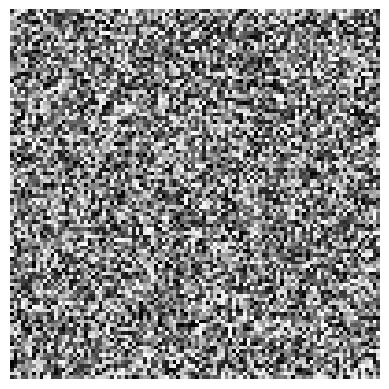

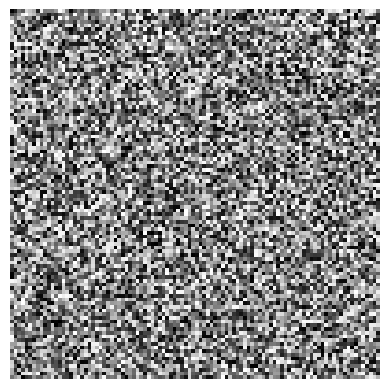

In [33]:
image = np.random.rand(100, 100, 1)
spectra = simulate_maldi_spectra(image, 50)
plot_image(image)
img = create_maldi_image(spectra)
plot_image(img)

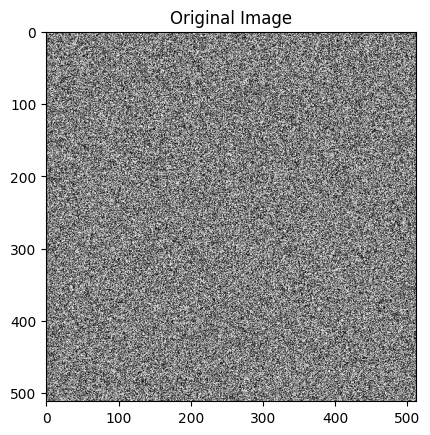

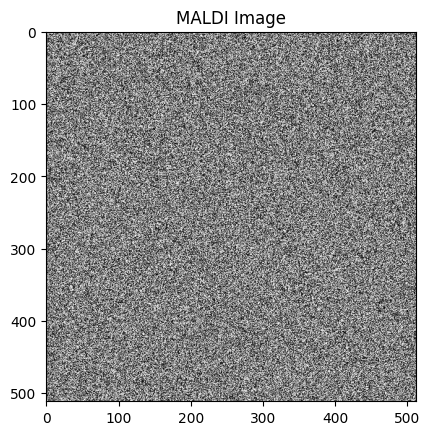

The arrays have different values


In [36]:
# Generate a random black-and-white image as an np array
np.random.seed(42)
image = np.random.randint(low=0, high=256, size=(512, 512), dtype=np.uint8)

# Plot the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Simulate MALDI-spectra for each pixel in the image
spectra = []
for row in range(image.shape[0]):
    row_spectra = []
    for col in range(image.shape[1]):
        pixel_intensity = image[row, col]
        maldi_spectrum = np.random.normal(loc=pixel_intensity, scale=10.0, size=100)
        row_spectra.append(maldi_spectrum)
    spectra.append(row_spectra)
spectra = np.array(spectra)

# Create a new black-and-white image from the MALDI-spectral data
maldi_image = np.mean(spectra, axis=2).astype(np.uint8)

# Plot the MALDI image
plt.imshow(maldi_image, cmap='gray')
plt.title('MALDI Image')
plt.show()

if np.array_equal(image, maldi_image):
    print("The arrays have the same values")
else:
    print("The arrays have different values")